## Forecasting the Electric Production Using Time series ARIMA Method

### Author : Saurabh Nigam

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

## Read the data

In [8]:
data=pd.read_csv(r'C:\Users\Dhruv Singh\Desktop\ptyhon ass\Electric_Production.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1985-01-01,71.5803
1985-02-01,69.7765
1985-03-01,61.6718
1985-04-01,56.7450
1985-05-01,54.6184


#Convert Date column as index

In [9]:
data.index = pd.to_datetime(data.index)

#Change the name of the variable to Energy Production for ease of understanding

In [10]:
data.columns = ['Energy Production']

#Plot the data

<AxesSubplot:xlabel='DATE'>

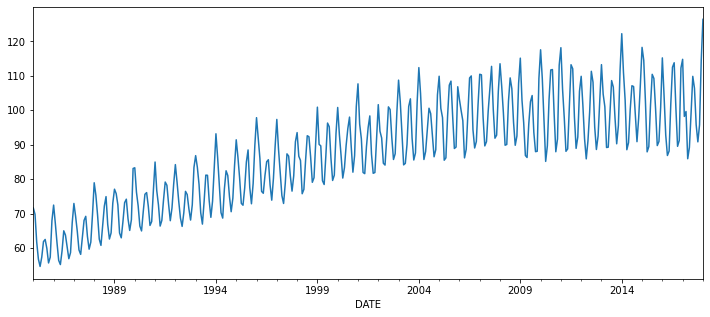

In [11]:
data['Energy Production'].plot(figsize=(12,5))

#Decompose the data into components

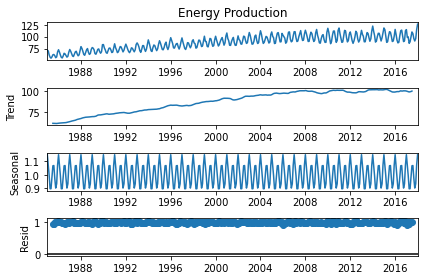

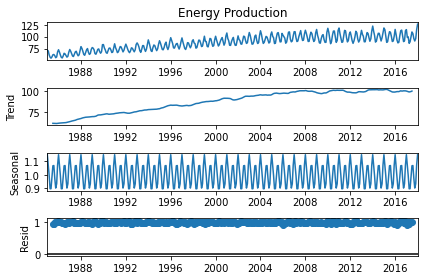

In [12]:
# ETS Decomposition
result = seasonal_decompose(data['Energy Production'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

#Stationarity Test

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(data['Energy Production'])

(-2.301304592960681,
 0.1715475595510184,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.3598201812765)

#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [15]:
!pip install pmdarima

In [37]:
from statsmodels.compat.pandas import Appender

In [38]:
import pmdarima as pm

In [39]:
from pmdarima import auto_arima

In [19]:
stepwise_fit = auto_arima(data['Energy Production'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2101.686, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2746.141, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2688.747, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2622.321, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2744.268, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2490.314, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2234.385, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2091.469, Time=2.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2447.067, Time=1.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2103.628, Time=2.72 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2057.207, Time=2.82 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2429.491, Time=1.50 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=2068.968, Time=3.25 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : 

In [40]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1020.603
Date:                Thu, 27 Jan 2022   AIC                           2057.207
Time:                        22:10:39   BIC                           2089.058
Sample:                             0   HQIC                          2069.825
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1082      0.024      4.510      0.000       0.061       0.155
ar.L1          0.9985      0.002    515.560      0.000       0.995       1.002
ar.L2         -0.9993      0.001   -791.218      0.000      -1.002      -0.997
ma.L1         -1.3668      0.038    -35.640      0.000      -1.442      -1.292
ma.L2          0.9311      0.071     13.034      0.000       0.791       1.071
ma.L3          0.0030      0.071      0.042      0.966      -0.137       0.143
ma.L4         -0.4322      0.041    -10.478      0.000      -0.513      -0.351
sigma2         9.9067      0.636     15.580      0.000       8.660      11.153
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                23.01
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#We’ll train from the years 1985–2016 and test our forecast on the years after that and compare it to the real data:

In [41]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [42]:
print(train.shape,test.shape)

(384, 1) (13, 1)


# Fit ARIMA model to the train dataset

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model = SARIMAX(train['Energy Production'], 
                order = (2, 1, 4))

C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [44]:
result = model.fit()
result.summary()

C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Energy Production   No. Observations:                  397
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -1029.493
Date:                Thu, 27 Jan 2022   AIC                           2072.986
Time:                        22:11:14   BIC                           2100.856
Sample:                    01-01-1985   HQIC                          2084.027
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9977      0.002    581.732      0.000       0.994       1.001
ar.L2         -0.9993      0.001   -842.714      0.000      -1.002      -0.997
ma.L1         -1.3179      0.042    -31.740      0.000      -1.399      -1.236
ma.L2          0.9311      0.075     12.451      0.000       0.785       1.078
ma.L3          0.0260      0.075      0.348      0.728      -0.120       0.172
ma.L4         -0.4089      0.046     -8.875      0.000      -0.499      -0.319
sigma2        10.3318      0.640     16.148      0.000       9.078      11.586
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                20.85
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Predictions of ARIMA model against the test set

In [45]:
start = len(train)
end = len(train) + len(test) - 1

In [46]:
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  

<AxesSubplot:xlabel='DATE'>

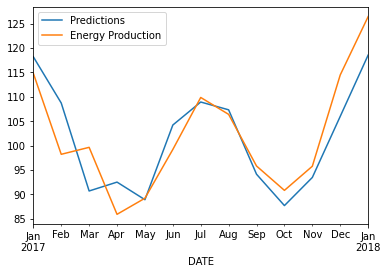

In [47]:
# plot predictions and actual values
predictions.plot(legend = True)
test['Energy Production'].plot(legend = True)

#Evaluate the model using MSE and RMSE

In [48]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [49]:
rmse(test["Energy Production"], predictions)

5.7114683974871

In [50]:
mean_squared_error(test["Energy Production"], predictions)

32.62087125549387

#Forecast using ARIMA Model

In [51]:
model = model = SARIMAX(data['Energy Production'], 
                        order = (2, 1, 4))
result = model.fit()

C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dhruv Singh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Forecast for the next 3 years

In [52]:
forecast = result.predict(start = len(data), 
                          end = (len(data)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

## Plot the forecast values

<AxesSubplot:xlabel='DATE'>

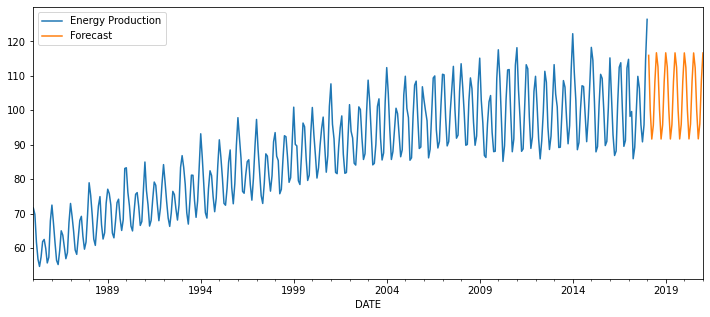

In [53]:
data['Energy Production'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)